In [1]:
from libraries import lib
from libraries.NeuralStates import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
N=10; J=1; Gamma=1
states = [n for n in range(2**N)]

In [4]:
H = lib.TFIM_hamiltonian(N, J, Gamma)
eigs = H.eigenstates()
gs = eigs[1][0]
gs

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape=(1024, 1), type='ket', dtype=Dense
Qobj data =
[[0.41058428]
 [0.11434388]
 [0.11434388]
 ...
 [0.11434388]
 [0.11434388]
 [0.41058428]]

In [6]:
elocs = []
for x in states:
    eloc = 0
    for xprime in lib.generate_adjacencies(x, N):
        eloc += lib.calc_H_elem(N, J, Gamma, x, xprime) * gs[xprime][0] / gs[x][0]
    elocs.append(eloc)
elocs = np.array(elocs)

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


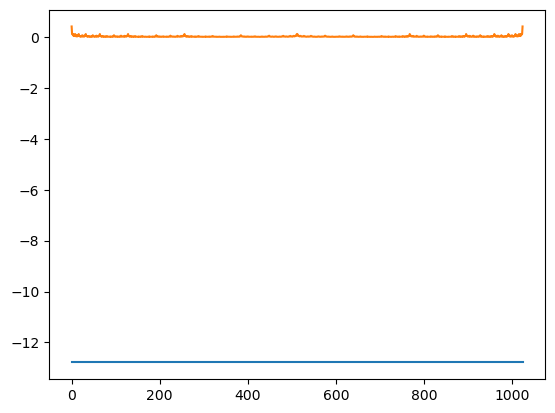

In [7]:
plt.plot(states, elocs)
plt.plot(states, abs(gs.full().flatten()))
plt.show()

In [8]:
eigs[0][0]

np.float64(-12.784906442999324)

In [9]:
elocs.mean()

np.complex128(-12.78490644299932+0j)

In [10]:
expect_elocs = 0
for x in states:
    expect_elocs += elocs[x] * abs(gs[x][0]) ** 2
print(expect_elocs)

(-12.784906442999333+0j)


In [11]:
sum(abs(gs[x][0]) ** 2 for x in states)

np.float64(0.9999999999999997)

In [12]:
gs.dag() @ lib.TFIM_hamiltonian(N, J, Gamma) @ gs

(-12.784906442999333+0j)

In [13]:
H_full = H.full()

In [14]:
psi_h_psi = 0
for x in states:
    for xprime in lib.generate_adjacencies(x, N):
        psi_h_psi += gs[x][0].conj() * H_full[x][xprime]  * gs[xprime][0]
print(psi_h_psi)

(-12.784906442999178+0j)


In [15]:
psi_h_psi = 0
for x in states:
    for xprime in lib.generate_adjacencies(x, N):
        psi_h_psi += gs[x][0].conj() * lib.calc_H_elem(N, J, Gamma, x, xprime) * gs[xprime][0]
print(psi_h_psi)

(-12.784906442999178+0j)
